In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rllab1/ai_generated_train_essays.csv
/kaggle/input/rllab1/ai_generated_train_essays_gpt-4.csv
/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv


In [40]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [56]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
df1 = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')
df2 = pd.read_csv('/kaggle/input/rllab1/ai_generated_train_essays.csv')
df3 = pd.read_csv('/kaggle/input/rllab1/ai_generated_train_essays_gpt-4.csv')

# Merge the DataFrames based on a common column, e.g., 'id'
merged_df = pd.merge(df1, df2)
merged_df = pd.merge(merged_df, df3)

# You can choose different types of joins (inner, outer, left, right) depending on your needs
# For example, using an outer join to keep all rows from all DataFrames, filling missing values with NaN:
# merged_df = pd.merge(df1, df2, on='id', how='outer')
# merged_df = pd.merge(merged_df, df3, on='id', how='outer')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)


In [57]:
df1.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [60]:
df2.head()

,id,prompt_id,text,generated
0,d429f032,0,Advantages of Limiting Car Usage \n\nLimiting ...,1
1,1ce279be,0,Advantages of Limiting Car Usage\n\nLimiting c...,1
2,c9595213,0,Limiting car usage has numerous advantages tha...,1
3,f2266d87,0,The passages provided discuss the advantages o...,1
4,eeace4bd,0,Title: The Advantages of Limiting Car Usage\n\...,1


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         500 non-null    object
 1   prompt_id  500 non-null    int64 
 2   text       500 non-null    object
 3   generated  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [62]:
frames = [df1, df2,df3]
 
merged_df = pd.concat(frames)
merged_df.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [63]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2078 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2078 non-null   object
 1   prompt_id  2078 non-null   int64 
 2   text       2078 non-null   object
 3   generated  2078 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 81.2+ KB


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [14]:
df.duplicated().sum()

0

In [64]:
columns_to_drop = ['id', 'prompt_id']
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
195,"Dear Senator [Your Senator's Name],\n\nI am wr...",1
196,"Dear Senator,\n\nI am writing today to express...",1
197,"Dear Senator,\n\nI hope this letter finds you ...",1
198,"Senator [Your Senator’s Name],\n\nI am a const...",1


In [15]:
!pip install tensorflow


In [65]:
# Split the data into features (X) and labels (y)
X = merged_df['text']  # assuming 'text' is the column containing your text data
y = merged_df['generated']  # assuming 'label' is the column containing your labels

# Split the data into training and testing sets
# Adjust the test_size parameter to set the proportion of the dataset to include in the test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming you have preprocessed and split your data into X_train, y_train, X_test, y_test

# Placeholder values - replace these with actual values based on your data
vocab_size = 10000  # Choose an appropriate vocabulary size
embedding_dim = 50  # Choose the dimensionality of the embedding space
max_length = 100    # Choose the maximum length of your input sequences
num_classes = len(set(y_train))  # Number of classes/categories in your dataset
epochs = 10         # Choose the number of training epochs
batch_size = 32     # Choose the batch size

# Tokenize the text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

# Encode labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test_encoded))


Epoch 1/10
52/52 [==============================] - 4s 57ms/step - loss: 0.4258 - accuracy: 0.7864 - val_loss: 0.2864 - val_accuracy: 0.9639
Epoch 2/10
52/52 [==============================] - 3s 51ms/step - loss: 0.0939 - accuracy: 0.9826 - val_loss: 0.0302 - val_accuracy: 0.9928
Epoch 3/10
52/52 [==============================] - 3s 54ms/step - loss: 0.0942 - accuracy: 0.9765 - val_loss: 0.1036 - val_accuracy: 0.9784
Epoch 4/10
52/52 [==============================] - 3s 51ms/step - loss: 0.0194 - accuracy: 0.9982 - val_loss: 0.0741 - val_accuracy: 0.9880
Epoch 5/10
52/52 [==============================] - 3s 52ms/step - loss: 0.0435 - accuracy: 0.9934 - val_loss: 0.0551 - val_accuracy: 0.9880
Epoch 6/10
52/52 [==============================] - 3s 51ms/step - loss: 0.0220 - accuracy: 0.9958 - val_loss: 0.0275 - val_accuracy: 0.9928
Epoch 7/10
52/52 [==============================] - 3s 52ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.0294 - val_accuracy: 0.9928
Epoch 8/10
52

In [67]:
# Assuming you have already trained the model

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')


13/13 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.9904
Test Loss: 0.0385
Test Accuracy: 99.04%


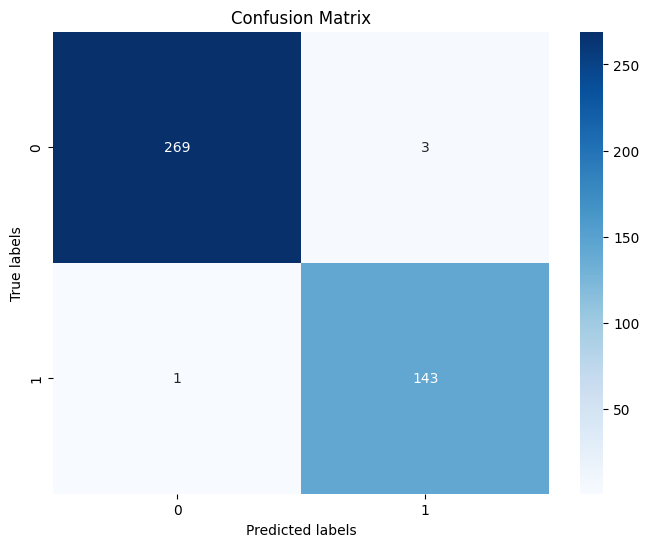


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       272
           1       0.98      0.99      0.99       144

    accuracy                           0.99       416
   macro avg       0.99      0.99      0.99       416
weighted avg       0.99      0.99      0.99       416



In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# You can also print a classification report for more detailed performance metrics
class_report = classification_report(y_test_classes, y_pred_classes)
print("\nClassification Report:")
print(class_report)


In [ ]:
df4 = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv')

In [71]:
# Save predictions and true labels to a CSV file
df = pd.DataFrame({'True Labels': y_test_classes, 'Predicted Labels': y_pred_classes})
df.to_csv('predictions.csv', index=False)


In [ ]:
# Split the data into features (X) and labels (y)
X = merged_df['text']  # assuming 'text' is the column containing your text data
y = merged_df['generated']  # assuming 'label' is the column containing your labels

# Split the data into training and testing sets
# Adjust the test_size parameter to set the proportion of the dataset to include in the test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
